In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [3]:
type(metro_pd.Date[0])

str

In [4]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [5]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
a = metro_pd.set_index('Date')

In [ ]:
a.index

In [8]:
b = a.loc[a.index.dropna()]

In [9]:
b

,ObjectId,ReportedOn,ReportedCum,Deceased,Recovered,Hospitalized,ICU,Vent,StillIll,PosPatients,...,BCLabTests,BCTestNegative,BCTestPositive,BCTestInc,DBCLabTests,DBCTestNegative,DBCTestPositive,DBCTestInc,WeekQuar,EverQuar
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 06:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 06:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 06:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 06:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13 05:00:00,123,230.0,4242.0,4.0,2271.0,500.0,213.0,92.0,1883.0,148.0,...,87113.0,82263.0,4753.0,97.0,2011.0,1801.0,208.0,2.0,NaN,NaN
2020-06-14 05:00:00,124,151.0,4393.0,0.0,2380.0,506.0,214.0,92.0,2025.0,176.0,...,88243.0,83278.0,4868.0,97.0,1130.0,1015.0,115.0,0.0,NaN,NaN
2020-06-15 05:00:00,125,44.0,4437.0,1.0,2287.0,507.0,215.0,92.0,2061.0,187.0,...,90198.0,85011.0,5090.0,97.0,1955.0,1733.0,222.0,0.0,NaN,NaN


In [10]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
c = b['PosPatients'].dropna()

In [12]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

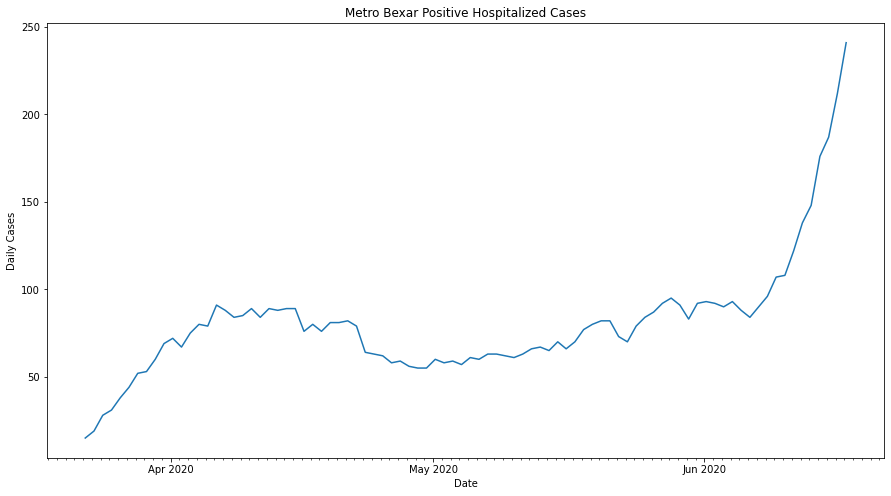

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Cases',color='black')
plt.title('Metro Bexar Positive Hospitalized Cases')
#plt.bar(c.index,c)
plt.plot(c)
fig.savefig('MetroPosHospitalized.png')